# Analysis on a sample data of 566602 suspected cases

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib notebook

In [3]:
df = pd.read_csv("covid.csv")

In [4]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

In [29]:
import numpy as np

In [55]:
bins = np.arange(0,120,10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

<IPython.core.display.Javascript object>


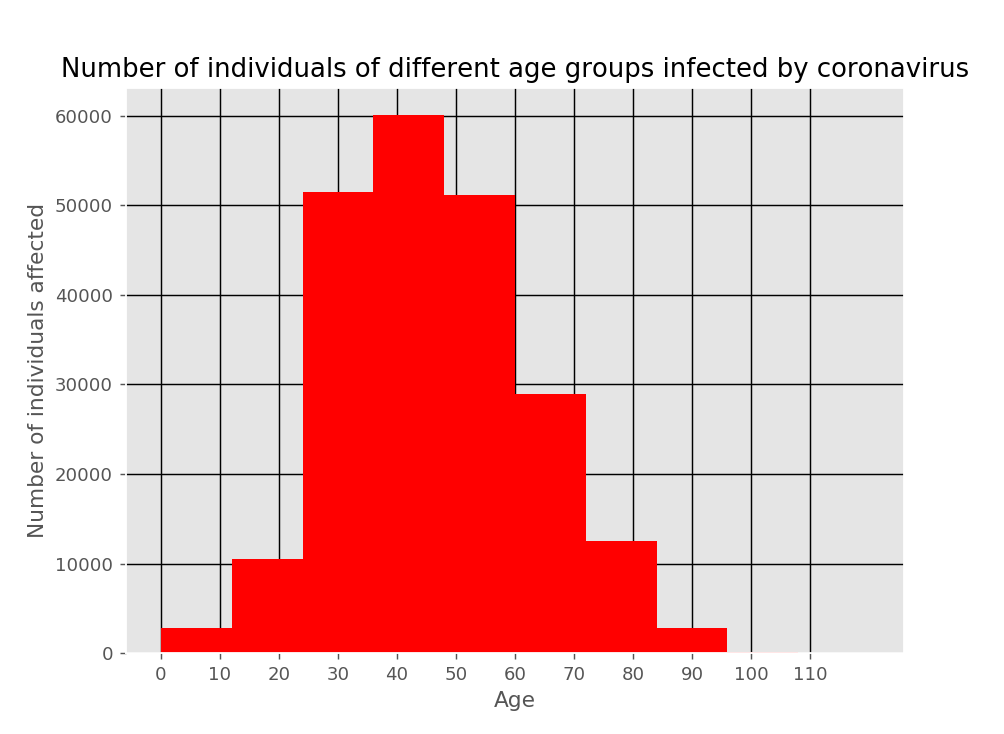

In [74]:
df[df["covid_res"]==1]["age"].plot(kind = 'hist', bins = 10, color = ['red','blue'],xticks= bins)
plt.ylabel("Number of individuals affected")
plt.xlabel("Age")
plt.title("Number of individuals of different age groups infected by coronavirus")
plt.show()
plt.grid(color = "black")

### People of age 35-45 were most infected 

In [5]:
def to_death(a):
    if a!='9999-99-99':
        return 1
    else:
        return 0
df["dead"] = df["date_died"].apply(to_death)    

<IPython.core.display.Javascript object>


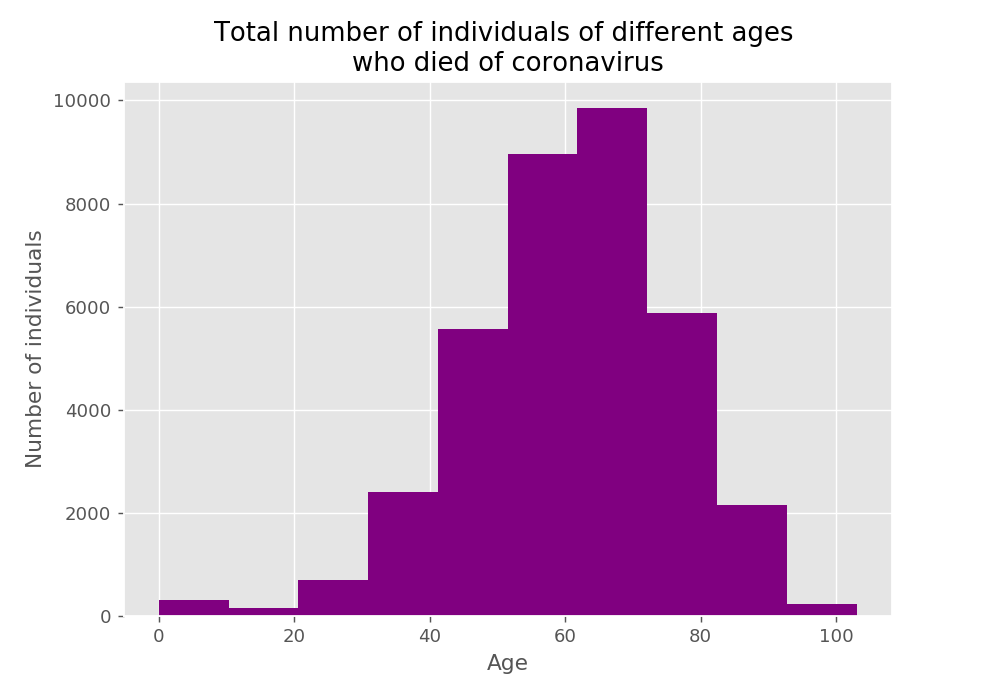

Text(0.5,1,'Total number of individuals of different ages \nwho died of coronavirus')

In [66]:
df[df["dead"]==1]["age"].plot(kind = 'hist', color = 'purple')
plt.xlabel("Age")
plt.ylabel("Number of individuals")
plt.title("Total number of individuals of different ages \nwho died of coronavirus")

## People of age group 60-70 were the most to be died of coronavirus. 

In [86]:
def age_convert(age):
    if age<10:
        return '0-10'
    if age>=10 and age<20:
        return '10-20'
    if age>=20 and age<30:
        return '20-30' 
    if age>=30 and age<40:
        return '30-40' 
    if age>=40 and age<50:
        return '40-50' 
    if age>=50 and age<60:
        return '50-60' 
    if age>=60 and age<70:
        return '60-70' 
    if age>=70 and age<80:
        return '70-80'
    if age>=80 and age<90:
        return '80-90'     
    if age>=90 and age<100:
        return '90-100' 
    if age>=100 and age<110:
        return '100-110'     

In [87]:
df["age_grp"] = df["age"].apply(age_convert)

In [88]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'dead', 'age_grp'],
      dtype='object')

In [89]:
inf = df[df["covid_res"]==1]

In [90]:
mort = inf.groupby("age_grp").sum()[['covid_res','dead']]

In [91]:
mort["MR"] = (mort['dead']/mort['covid_res'])*100

In [103]:
age =list( mort.index)

In [104]:
mr = list(mort["MR"])

In [105]:
n = age[2]
m = mr[2]
age.remove(n)
mr.remove(m)
age.append(n)
mr.append(m)

<IPython.core.display.Javascript object>


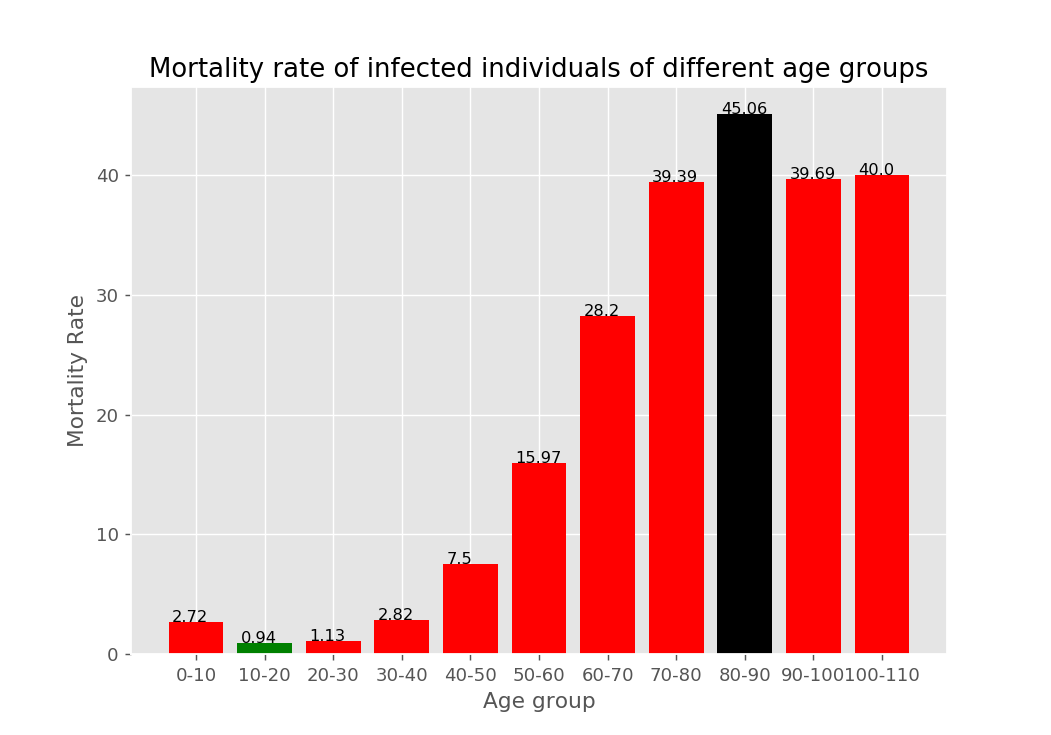

In [119]:
plt.bar(age,mr, color = ["r","g","r","r","r","r","r","r","k","r","r"])
plt.title("Mortality rate of infected individuals of different age groups")
plt.xlabel("Age group")
plt.ylabel("Mortality Rate")
for i,v in enumerate(mr):
    plt.text(i-.35,v,round(mr[i],2), fontsize = 9)
plt.show()    

### Mortality rate is gradially increases as the age increases. Age group of 80-90 has the highest mortality rate. Quite surprising to see that it is even higher than age group 90-100. 
### Also, age group of 10-20 has the lowest mortality rate.
### To be note that, children of age 0-10 has higher mortality rate than that of youths and teenagers.

In [46]:
inf = df[df["covid_res"]==1]

In [47]:
dead = inf[inf["dead"]== 1]

In [48]:
#'pneumonia','diabetes','copd','asthma','hypertension','hypertension','obesity','renal_chronic','tobacco'

In [49]:
disease=['pneumonia','diabetes','copd','asthma','hypertension','obesity','renal_chronic','tobacco','cardiovascular']

In [50]:
infected = []
died = []

In [51]:
for dis in disease:
    infected.append(inf[dis].value_counts().values[1])
    died.append(dead[dis].value_counts().values[1])    

In [52]:
infected = np.array(infected)

In [53]:
died = np.array(died)

In [54]:
mortality = (died/infected)*100

In [57]:
new = pd.DataFrame(index = d,data = mortality, columns= ["Mortalty"])

In [56]:
d = ['Pneumonia','Diabetes','Copd','Asthma','Hypertension','Obesity','Chrnic Renal Disease','Tobacco Addiction','Cardiovascular Disease']

In [58]:
new.sort_values("Mortalty", ascending = False, inplace =True)

<IPython.core.display.Javascript object>


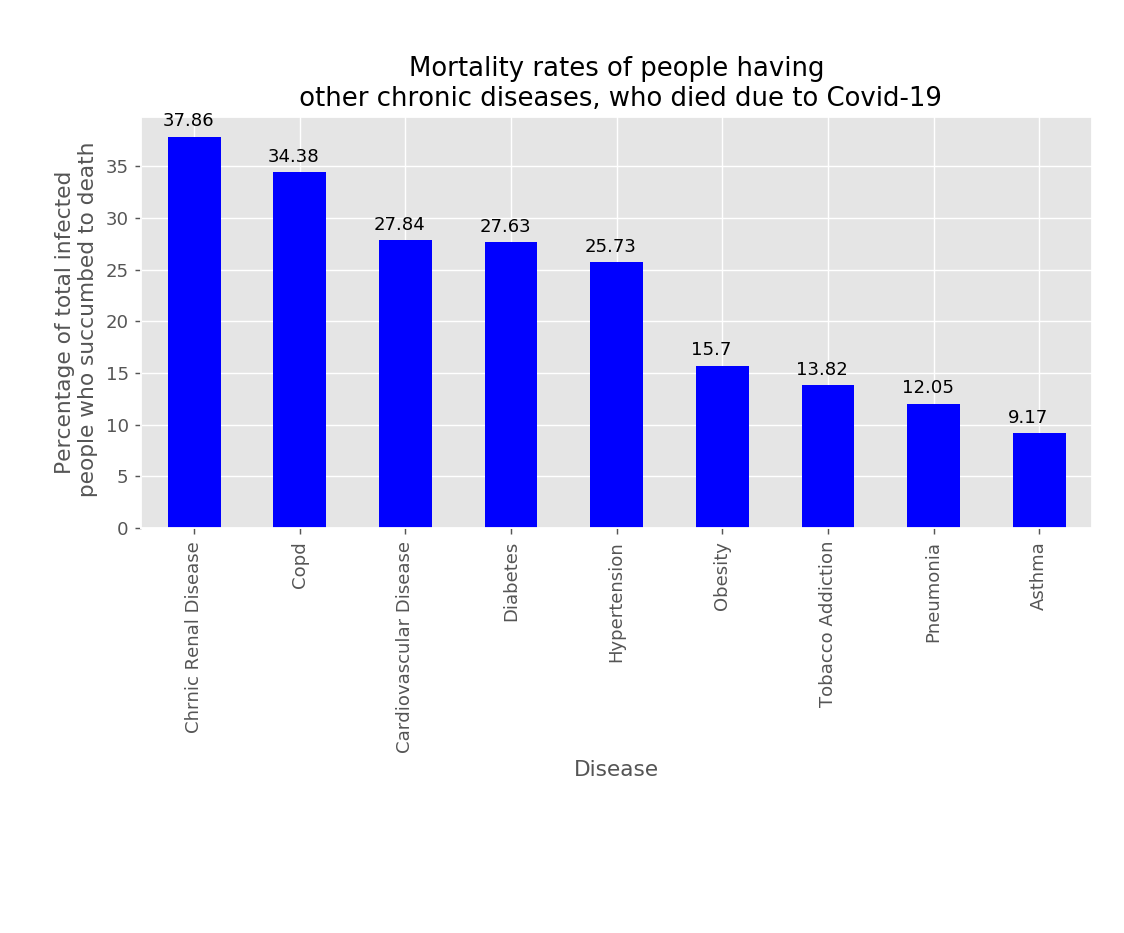

In [59]:
new["Mortalty"].plot(kind = "bar", color = "blue")
plt.xlabel("Disease")
plt.ylabel("Percentage of total infected\n people who succumbed to death")
plt.title("Mortality rates of people having\n other chronic diseases, who died due to Covid-19")
for i,v in enumerate(new['Mortalty'].values):
    plt.text(i-.3,v+1,round(v,2), fontsize = 10)
plt.tight_layout()
plt.show()

### We see that , out of the  total corona infected people who were already suffering from  Chronic Renal Disese, almost 38% of them died. The figures are also very high for people suffering from COPD , Cardiovascular disease, Diabetes and Hypertention. So, persons suffering from these chronic diseseases need to be extacareful.

In [10]:
plt.style.use('ggplot')

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


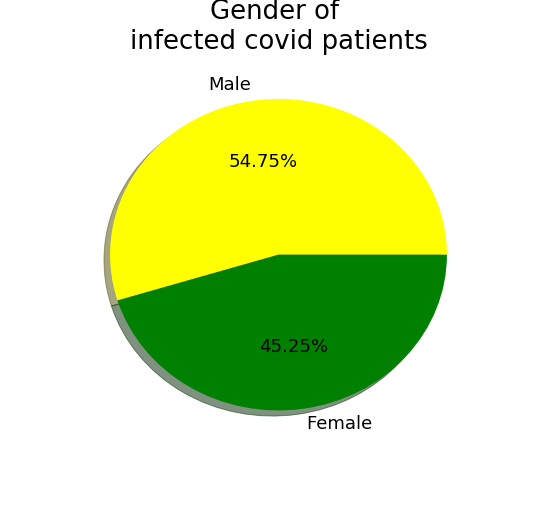

In [23]:
plt.pie(df[df["covid_res"]==1]['sex'].value_counts().values, labels = ["Male","Female"],shadow = True, colors = ['yellow','green'], autopct = "%.2f%%")
plt.title("Gender of \ninfected covid patients")
plt.show()

<IPython.core.display.Javascript object>


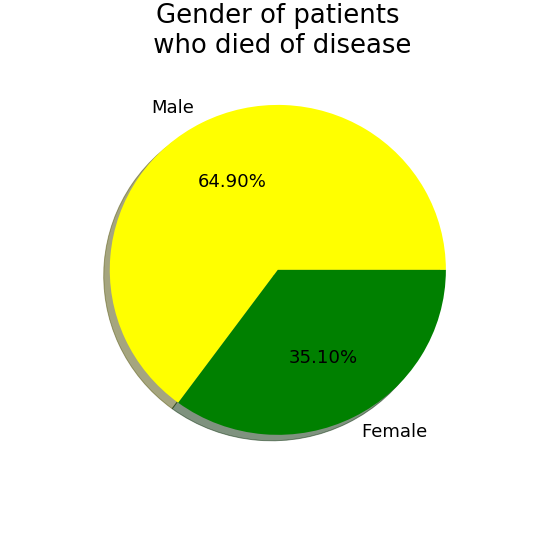

Text(0.5,1,'Gender of patients\n who died of disease')

In [27]:
plt.pie(df[df["dead"]==1]['sex'].value_counts().values, labels = ["Male","Female"],shadow = True, colors = ['yellow','green'], autopct = "%.2f%%")
plt.title("Gender of patients\n who died of disease")

In [30]:
s = np.array(df[df["covid_res"]==1]['sex'].value_counts().values)
e = np.array(df[df["dead"]==1]['sex'].value_counts().values)

<IPython.core.display.Javascript object>


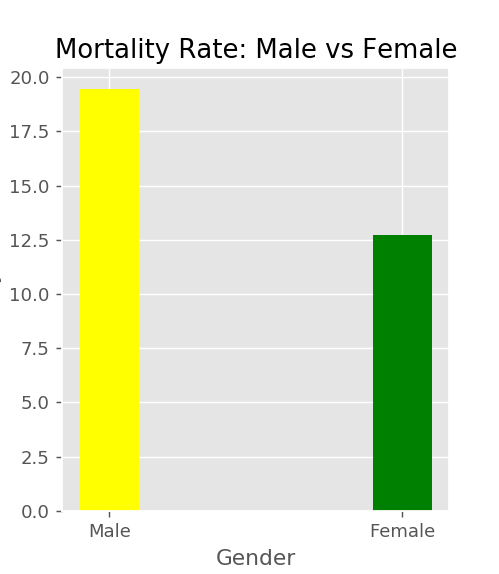

In [44]:
plt.bar(["Male","Female"],(e/s)*100, color = ["yellow",'g'], width = 0.2)
plt.title("Mortality Rate: Male vs Female")
plt.xlabel('Gender')
plt.ylabel("Mortality Rate")
plt.show()

### Male mortality rate is higher than that of female.

<IPython.core.display.Javascript object>


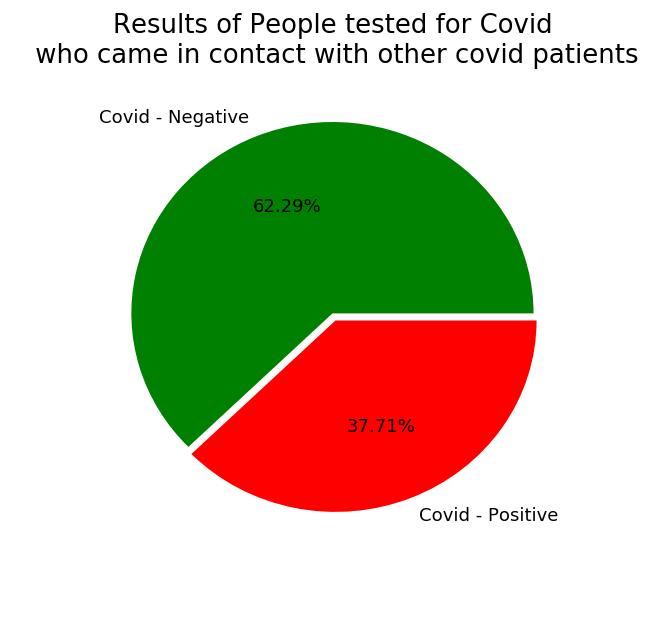

Text(0.5,1,'Results of People tested for Covid\n who came in contact with other covid patients')

In [68]:
n = df[df['contact_other_covid']==1]["covid_res"].value_counts().values[:2]

plt.pie(n,labels=["Covid - Negative","Covid - Positive"],autopct = "%.2f%%", colors= ['green','red'], explode=[0,0.04])
plt.title("Results of People tested for Covid\n who came in contact with other covid patients")

### 37.71% of people who came in contact with covid patients, were found to be infected after diagonosys.This value should actually be even higher because many of the covid cases goes unreported.

In [78]:
inf["pregnancy"].value_counts()

97    120799
2      97749
1       1425
98       684
Name: pregnancy, dtype: int64

In [79]:
#1425 women were pregnant and infected

In [81]:
inf.groupby("pregnancy").sum()["dead"]

pregnancy
1        35
2      9171
97    17892
98       23
Name: dead, dtype: int64

In [83]:
#35 pregnant ladies died

<IPython.core.display.Javascript object>


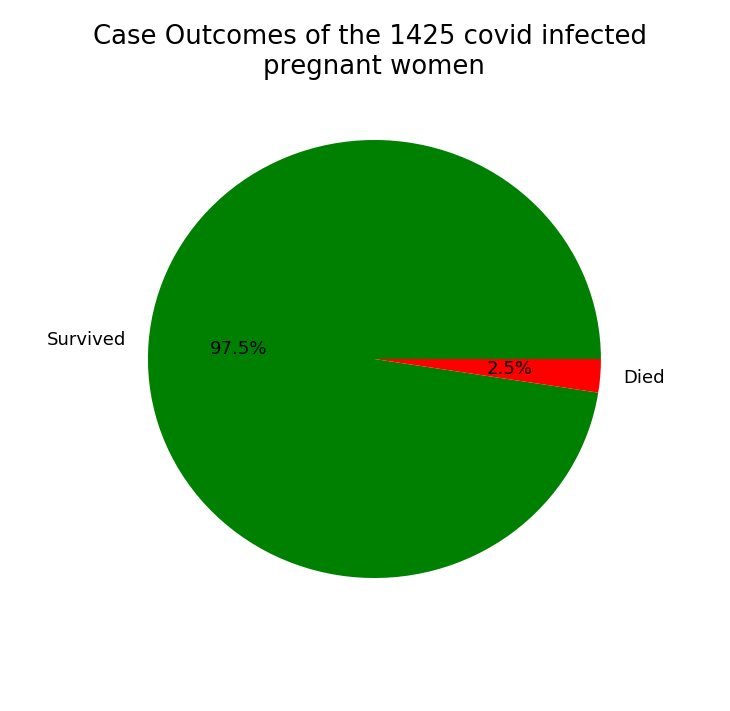

In [88]:
plt.pie([1425-35,35], labels = ["Survived","Died"], autopct = "%.1f%%", colors =["green",'red'])
plt.title("Case Outcomes of the 1425 covid infected \npregnant women")
plt.show()

### Though immunity of body is somewhat reduced during pregnancy, still 97.5% of the pregnant, women survived.This can be because, pregnant women generally comes under the age group of 25-35, where the mortality rate is very low.

In [91]:
inf[inf["icu"]== 1].shape

(5822, 24)

In [92]:
#5822 total icu cases

In [93]:
inf[inf["icu"]== 1].groupby('icu').sum()["dead"]

icu
1    2983
Name: dead, dtype: int64

In [94]:
#2983 icu patients died

<IPython.core.display.Javascript object>


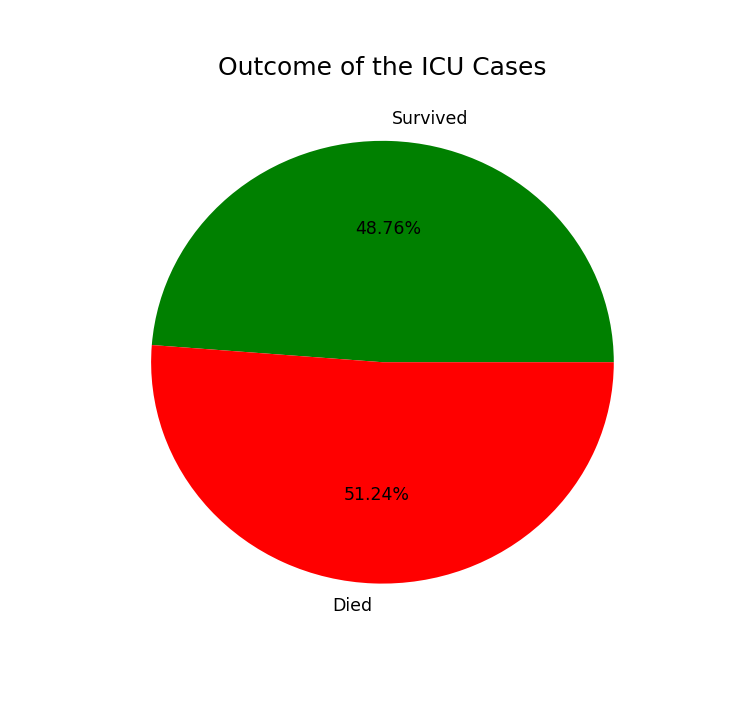

Text(0.5,1,'Outcome of the ICU Cases')

In [95]:
plt.pie([5822-2983,2983], labels = ["Survived","Died"], autopct = "%.2f%%", colors =["green",'red'])
plt.title("Outcome of the ICU Cases")

### We can see that majority, almost half(51.24%) of the patients in ICU, died.